# Check the prior probability of the learnt normalising flow.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')

In [2]:

import hmac
import matplotlib.pyplot as plt
from src.HMC_Single_Star_cosdist import HMC_Sampler
from src import NF_Cos_dist
import jax.numpy as jnp
import numpy as np
import matplotlib.colors as mcolors

nf=NF_Cos_dist.JaxNormFlow()

hmc=HMC_Sampler()

/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/bin/../lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


8164992
7558434
8164992
7558434


(400, 38)
[0.68798494 0.12899129 0.12420297 0.845053   0.34005776 0.76696837
 0.40496975 0.38573617 0.57134604 0.26081905 0.8213495  0.28000054
 0.7663395  0.26581562 0.1697771  0.49908647 0.8202327  0.81862444
 0.540889   0.43322322 0.3767857  0.63342303 0.14949113 0.13206129
 0.5008804  0.1696506  0.38267395 0.79712206 0.5342523  0.20189427
 0.5278588  0.40605304 0.32086137 0.8353881  0.79892886 0.8112913
 0.7392876  0.18808742]
[2.6822090e-06 4.0233135e-07 3.0547380e-07 3.5762787e-07 9.2387199e-07
 1.6093254e-06 1.9371510e-06 5.9604645e-07 2.3245811e-06 1.0430813e-06
 1.4901161e-06 9.5367432e-07 1.1920929e-06 6.5565109e-07 4.0233135e-07
 1.6734170e-06 1.6093254e-06 9.5367432e-07 2.6226044e-06 5.9604645e-08
 1.3411045e-06 8.9406967e-07 2.0861626e-07 6.4074993e-07 1.8379602e-06
 4.4703484e-07 1.0728836e-06 3.2782555e-06 1.5497208e-06 1.0430813e-07
 1.6689301e-06 1.6689301e-06 1.1920929e-06 7.7486038e-07 1.0728836e-06
 2.5033951e-06 1.9669533e-06 2.3841858e-07]


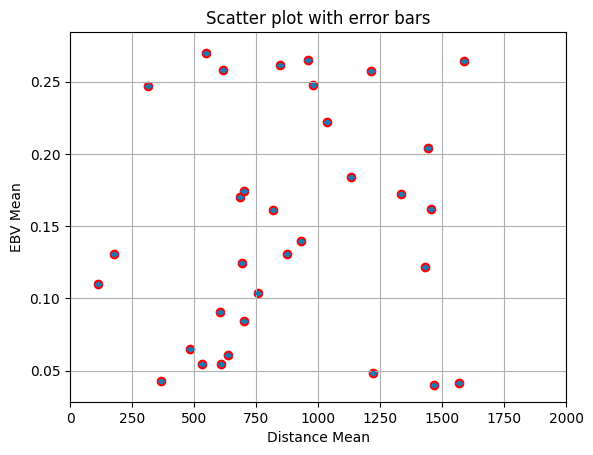

In [3]:
hmc.plot_profile()

In [3]:
j=nf=NF_Cos_dist.JaxNormFlow()
import jax.numpy as jnp
import jax.random as jr
samples=j.flow.sample(jr.PRNGKey(0),sample_shape=(10000,))
samples=samples+j.mean#*j.std
real=j.data+j.mean#*j.std+j.mean

1285056
1226200


In [4]:
no_ext=j.data[:len(j.data)//32]
log_p_noext=j.flow.log_prob(no_ext)
no_ext+=j.mean

In [5]:
phots=[]
logps=[]
a0s=[]

for a0 in [0.0]:
    ext_phot=hmc.extincted_phot(real[:len(j.data)//32],a0*jnp.ones_like(real[:len(j.data)//32,0]))[0]-j.mean
    log_p_ext=j.flow.log_prob(ext_phot)
    ext_phot+=j.mean

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:len(j.data)//32,0]))
pho=np.concatenate(phots,0)
lp=np.concatenate(logps,0)
a0s=np.concatenate(a0s,0)

In [6]:
phots=[]
logps=[]
a0s=[]
for a0 in [0.15]:
    ext_phot=hmc.extincted_phot(real[:len(j.data)//32],a0*jnp.ones_like(real[:len(j.data)//32,0]))[0]-j.mean
    log_p_ext=j.flow.log_prob(ext_phot)
    ext_phot+=j.mean

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:len(j.data)//32,0]))
pho_1=np.concatenate(phots,0)
lp_1=np.concatenate(logps,0)
a0s_1=np.concatenate(a0s,0)

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_8283/2775902274.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pho[:,2], pho[:,1], s=0.05, cmap='rocket')


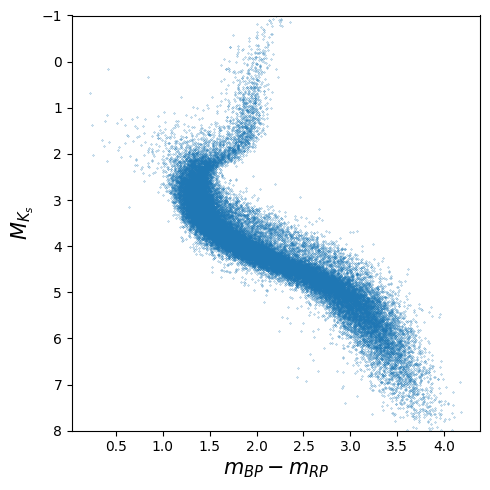

In [7]:
vmin = -10
vmax = lp.max()
plt.figure(figsize=(5,5))
plt.scatter(pho[:,2], pho[:,1], s=0.05, cmap='rocket')
#cbar = plt.colorbar()
#cbar.set_label('log_p')
#plt.scatter(no_ext[:,3]-no_ext[:,4], no_ext[:,1], c='b', s=0.01)

# Add colorbar with title


# Label x and y axes
plt.xlabel('$m_{BP}-m_{RP}$',fontsize=15)
plt.ylabel('$M_{K_s}$',fontsize=15)
plt.ylim(8,-1)
plt.tight_layout()
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/sample_learnt.png', dpi=300)





/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_8283/3407906822.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(samples[:,2], samples[:,1], s=0.05, cmap='rocket')


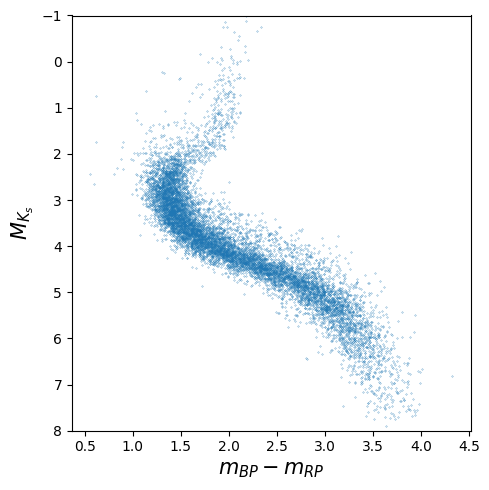

In [8]:
vmin = -10
vmax = lp.max()
plt.figure(figsize=(5,5))
plt.scatter(samples[:,2], samples[:,1], s=0.05, cmap='rocket')
#cbar = plt.colorbar()
#cbar.set_label('log_p')
#plt.scatter(no_ext[:,3]-no_ext[:,4], no_ext[:,1], c='b', s=0.01)

# Add colorbar with title


# Label x and y axes
plt.xlabel('$m_{BP}-m_{RP}$',fontsize=15)
plt.ylabel('$M_{K_s}$',fontsize=15)
plt.ylim(8,-1)
plt.tight_layout()
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/sample_learnt.png', dpi=300)





In [9]:
2.5*np.log10(2)

0.752574989159953

In [10]:
ext_phot

Array([[6.687612 , 4.972221 , 3.0715091, ..., 2.4917414, 2.17101  ,
        1.9798628],
       [9.713012 , 2.496384 , 1.2273151, ..., 1.1396211, 1.1285741,
        1.0963176],
       [8.976267 , 3.3795786, 1.5306331, ..., 1.3610008, 1.3111436,
        1.258392 ],
       ...,
       [9.153663 , 3.766794 , 1.7641302, ..., 1.5464025, 1.4793289,
        1.4183749],
       [9.21623  , 3.4514909, 1.5749502, ..., 1.4069732, 1.3718486,
        1.3288922],
       [7.7493052, 5.0051646, 2.9687319, ..., 2.4298902, 2.1291428,
        1.9580764]], dtype=float32)

In [11]:
phots=[]
logps=[]
a0s=[]
orig=[]
for a0 in np.arange(0,1,0.1):
    ext_phot=hmc.extincted_phot(real[:len(j.data)//32],a0*jnp.ones_like(real[:len(j.data)//32,0]))[0]-j.mean
    log_p_ext=j.flow.log_prob(ext_phot)
    orig.append(real[:len(j.data)//32])

    ext_phot+=j.mean

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:len(j.data)//32,0]))
pho=np.concatenate(phots,0)
lp=np.concatenate(logps,0)
a0s=np.concatenate(a0s,0)
orig=np.concatenate(orig,0)


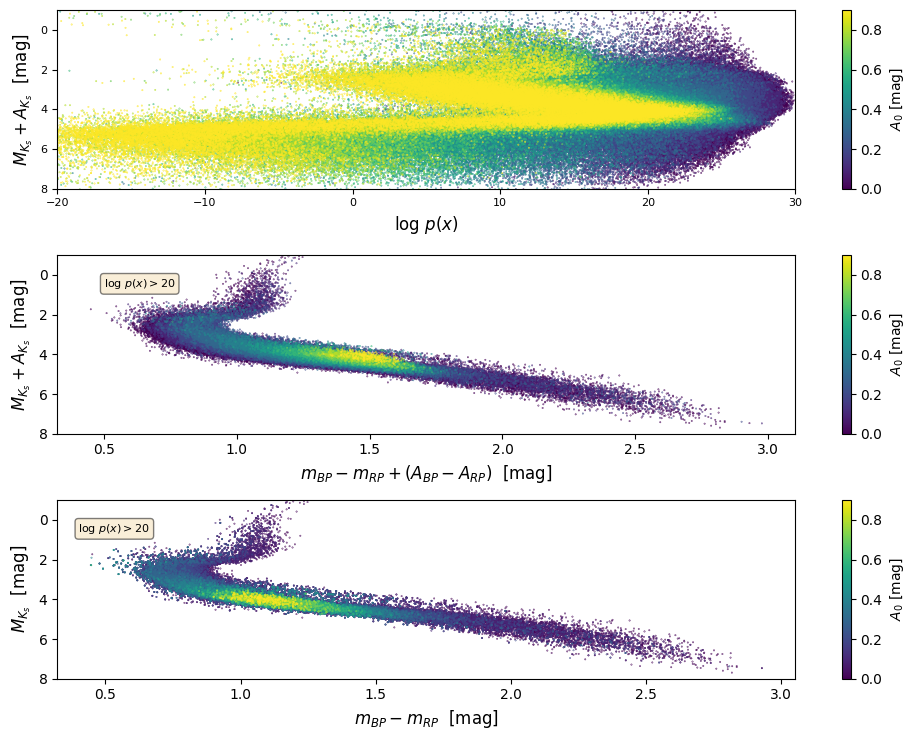

In [12]:

fig, ax = plt.subplots(3,1,figsize=(10, 7.5))  # figure size in inches (width, height)

# Scatter plot with colormap bounds
scatter2 = ax[0].scatter(lp, pho[:, 1], c=a0s, s=0.1, cmap='viridis', vmin=a0s.min(), vmax=a0s.max())

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax[0])
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax[0].set_xlabel('log $p(x)$', fontsize=12)
ax[0].set_ylabel('$M_{K_s}+A_{K_s}$  [mag]', fontsize=12)
ax[0].set_ylim(8, -1)
ax[0].set_xlim(-20, 30)

# Set font sizes for ticks
ax[0].tick_params(axis='both', which='major', labelsize=8)

# Add legend


indexes=(lp>22)

scatter2 = ax[1].scatter(pho[indexes,3]-pho[indexes,4], pho[indexes,1], c=a0s[indexes], s=0.1, cmap='viridis')

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax[1])
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax[1].set_xlabel('$m_{BP}-m_{RP}+(A_{BP}-A_{RP})$  [mag]', fontsize=12)
ax[1].set_ylabel('$M_{K_s}+A_{K_s}$  [mag]', fontsize=12)
ax[1].set_ylim(8, -1)
#ax[1].set_xlim(-20, 30)

# Set font sizes for ticks
ax[1].tick_params(axis='both', which='major', labelsize=10)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax[1].text(0.5, 0.1, "log $p(x) > 20$", fontsize=8,
        verticalalignment='top', bbox=props)




scatter2 = ax[2].scatter(orig[indexes,3]-orig[indexes,4], orig[indexes,1], c=a0s[indexes], s=0.1, cmap='viridis')

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax[2])
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax[2].set_xlabel('$m_{BP}-m_{RP}$  [mag]', fontsize=12)
ax[2].set_ylabel('$M_{K_s}$  [mag]', fontsize=12)
ax[2].set_ylim(8, -1)
#ax[1].set_xlim(-20, 30)

# Set font sizes for ticks
ax[2].tick_params(axis='both', which='major', labelsize=10)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax[2].text(0.4, 0.1, "log $p(x) > 20$", fontsize=8,
        verticalalignment='top', bbox=props)



# Adjust layout
plt.tight_layout()

# Save the plot if needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/prior_log_prob.png', dpi=300)

# Display the plot
plt.show()

(20.0, 32.0)

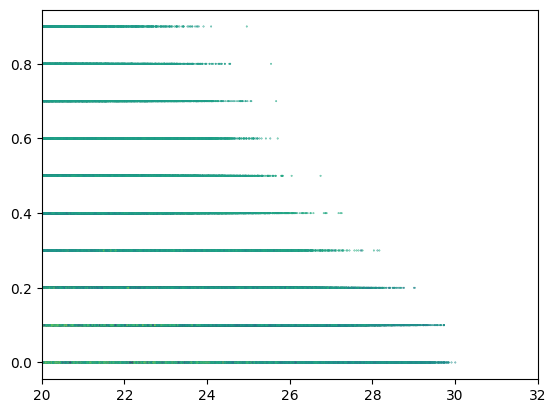

In [13]:
plt.scatter(lp,a0s,c=orig[:,1], s=0.11, cmap='viridis')
plt.xlim(20,32)

(20.0, 32.0)

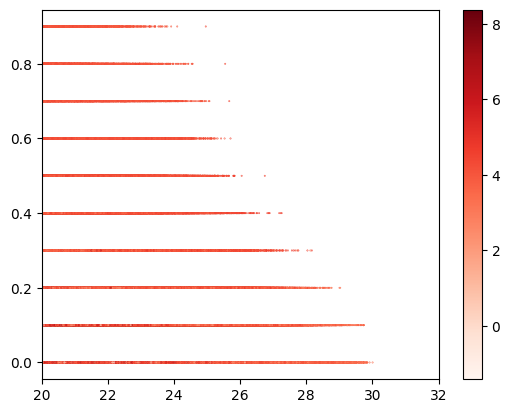

In [14]:
plt.scatter(lp,a0s,c=orig[:,1], s=0.11, cmap='Reds')
plt.colorbar()
plt.xlim(20,32)

In [15]:
phots=[]
logps=[]
a0s=[]
orig=[]
for a0 in np.arange(0,0.3,0.02):
    ext_phot=hmc.extincted_phot(real[:len(j.data)//32],a0*jnp.ones_like(real[:len(j.data)//32,0]),subtract=True)[0]-j.mean
    log_p_ext=j.flow.log_prob(ext_phot)
    orig.append(real[:len(j.data)//32])

    ext_phot+=j.mean

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:len(j.data)//32,0]))
pho=np.concatenate(phots,0)
lp=np.concatenate(logps,0)
a0s=np.concatenate(a0s,0)
orig=np.concatenate(orig,0)


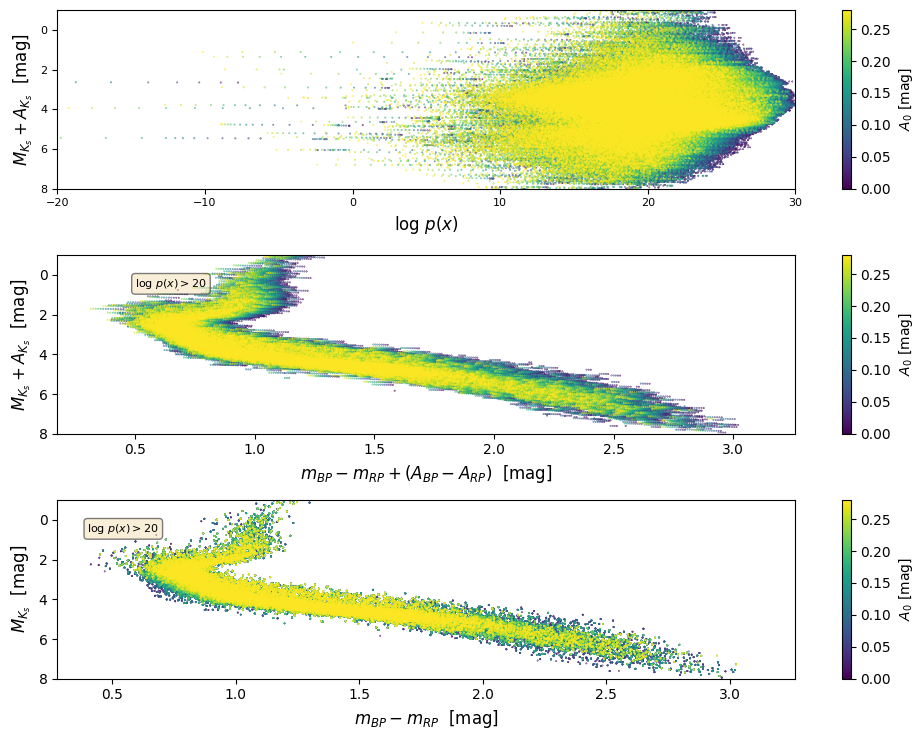

In [16]:

fig, ax = plt.subplots(3,1,figsize=(10, 7.5))  # figure size in inches (width, height)

# Scatter plot with colormap bounds
scatter2 = ax[0].scatter(lp, pho[:, 1], c=a0s, s=0.1, cmap='viridis', vmin=a0s.min(), vmax=a0s.max())

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax[0])
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax[0].set_xlabel('log $p(x)$', fontsize=12)
ax[0].set_ylabel('$M_{K_s}+A_{K_s}$  [mag]', fontsize=12)
ax[0].set_ylim(8, -1)
ax[0].set_xlim(-20, 30)

# Set font sizes for ticks
ax[0].tick_params(axis='both', which='major', labelsize=8)

# Add legend


indexes=(lp>20)

scatter2 = ax[1].scatter(pho[indexes,3]-pho[indexes,4], pho[indexes,1], c=a0s[indexes], s=0.1, cmap='viridis')

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax[1])
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax[1].set_xlabel('$m_{BP}-m_{RP}+(A_{BP}-A_{RP})$  [mag]', fontsize=12)
ax[1].set_ylabel('$M_{K_s}+A_{K_s}$  [mag]', fontsize=12)
ax[1].set_ylim(8, -1)
#ax[1].set_xlim(-20, 30)

# Set font sizes for ticks
ax[1].tick_params(axis='both', which='major', labelsize=10)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax[1].text(0.5, 0.1, "log $p(x) > 20$", fontsize=8,
        verticalalignment='top', bbox=props)




scatter2 = ax[2].scatter(orig[indexes,3]-orig[indexes,4], orig[indexes,1], c=a0s[indexes], s=0.1, cmap='viridis')

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax[2])
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax[2].set_xlabel('$m_{BP}-m_{RP}$  [mag]', fontsize=12)
ax[2].set_ylabel('$M_{K_s}$  [mag]', fontsize=12)
ax[2].set_ylim(8, -1)
#ax[1].set_xlim(-20, 30)

# Set font sizes for ticks
ax[2].tick_params(axis='both', which='major', labelsize=10)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax[2].text(0.4, 0.1, "log $p(x) > 20$", fontsize=8,
        verticalalignment='top', bbox=props)



# Adjust layout
plt.tight_layout()

# Save the plot if needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/prior_log_prob_nocuts.png', dpi=300)

# Display the plot
plt.show()

# Track a few stars

In [18]:
phots=[]
logps=[]
a0s=[]
orig=[]
for a0 in np.arange(0,0.3,0.02):
    ext_phot=hmc.extincted_phot(real[:len(j.data)//32][::1000],a0*jnp.ones_like(real[:len(j.data)//32,0])[::1000])[0]-j.mean
    log_p_ext=j.flow.log_prob(ext_phot)
    orig.append(real[:len(j.data)//32][::1000])

    ext_phot+=j.mean

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:len(j.data)//32,0][::1000]))
pho=np.concatenate(phots,0)
lp=np.concatenate(logps,0)
a0s=np.concatenate(a0s,0)
orig=np.concatenate(orig,0)


# Why this interesting band

(8.0, -1.0)

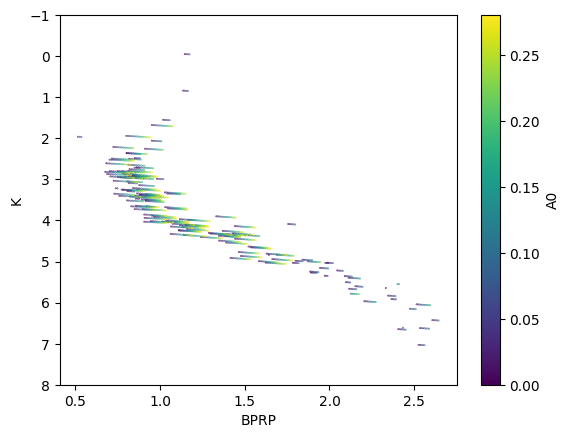

In [19]:
indexes=(lp>22)
plt.scatter(pho[indexes,3]-pho[indexes,4], pho[indexes,1], c=a0s[indexes], s=0.1, cmap='viridis')

# Add colorbar with title
cbar = plt.colorbar()
cbar.set_label('A0')

# Label x and y axes
plt.xlabel('BPRP')
plt.ylabel('K')
plt.ylim(8,-1)

Understanding of MAP

In [19]:
phots=[]
logps=[]
a0s=[]
for a0 in [0,0.15]:
    
    for i in range(32):
        ext_phot=hmc.extincted_phot(real[:len(j.data)//32]+jnp.array(np.random.multivariate_normal(real[0]*0,hmc.error.mean(0))),a0*jnp.ones_like(real[:len(j.data)//32,0]))[0]-j.mean

        log_p_ext=j.flow.log_prob(ext_phot)
        ext_phot+=j.mean

        phots.append(ext_phot)
        logps.append(log_p_ext)
        a0s.append(a0*jnp.ones_like(real[:len(j.data)//32,0]))
pho=np.concatenate(phots,0)
lp=np.concatenate(logps,0)
a0s=np.concatenate(a0s,0)

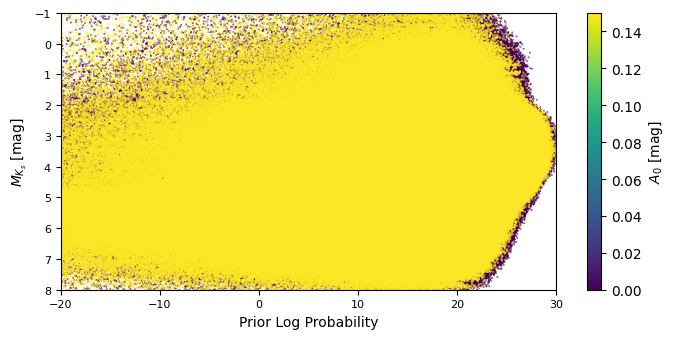

In [20]:
vmin = log_p_noext.min()
vmax = log_p_noext.max()
fig, ax = plt.subplots(figsize=(7, 3.5))  # figure size in inches (width, height)

# Scatter plot with colormap bounds
scatter2 = ax.scatter(lp, pho[:, 1], c=a0s, s=0.1, cmap='viridis', vmin=a0s.min(), vmax=a0s.max())

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax)
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax.set_xlabel('Prior Log Probability', fontsize=10)
ax.set_ylabel('$M_{K_s}$ [mag]', fontsize=10)
ax.set_ylim(8, -1)
ax.set_xlim(-20, 30)

# Set font sizes for ticks
ax.tick_params(axis='both', which='major', labelsize=8)

# Add legend

# Adjust layout
plt.tight_layout()

# Save the plot if needed

# Display the plot
plt.show()

# Grasp on Posterior

In [20]:
x=hmc.data[0]
err=jnp.linalg.inv(hmc.error[0])
real=hmc.normalising_flow.data+hmc.normalising_flow.mean

In [22]:
real[:len(j.data)//32].shape

(174331, 12)

In [23]:
ext_phot[0]

Array([[8.835419 , 2.4035711, 1.159133 , ..., 1.0892   , 1.0866003,
        1.0889997],
       [9.084905 , 2.832037 , 1.215415 , ..., 1.1485004, 1.1493006,
        1.1409006],
       [4.9157467, 5.914017 , 3.5002651, ..., 2.8347006, 2.3411999,
        2.1026   ],
       ...,
       [8.106328 , 4.599819 , 2.271966 , ..., 1.9085999, 1.7684002,
        1.6751003],
       [8.757593 , 2.6977406, 1.5095682, ..., 1.3473005, 1.3231001,
        1.29     ],
       [9.775379 , 3.0834532, 1.3080931, ..., 1.1887999, 1.1871004,
        1.1491003]], dtype=float32)

In [24]:
phots=[]
logps=[]
a0s=[]
for a0 in np.arange(0,1,0.02):
    ext_phot,l=hmc.extincted_phot(real[:len(j.data)//32],a0*jnp.ones_like(real[:len(j.data)//32,0]))
    log_p_ext=j.flow.log_prob(ext_phot-j.mean)
    gauss=jnp.einsum('bi,ij->bj',(ext_phot-x),err)
    gauss=jnp.einsum('bi,bi->b',gauss,(ext_phot-x))
    log_p_ext-=gauss

    phots.append(ext_phot)
    logps.append(log_p_ext)
    a0s.append(a0*jnp.ones_like(real[:len(j.data)//32,0]))
pho=np.concatenate(phots,0)
lp=np.concatenate(logps,0)
a0s=np.concatenate(a0s,0)


(-1000.0, 1.0)

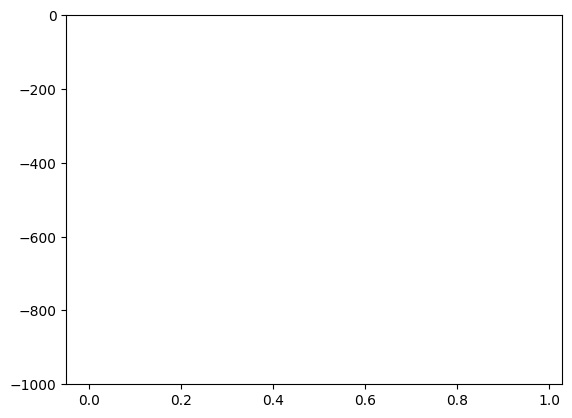

In [25]:
plt.scatter(a0s,lp)
plt.ylim(-1000,1)

<Axes: ylabel='Density'>

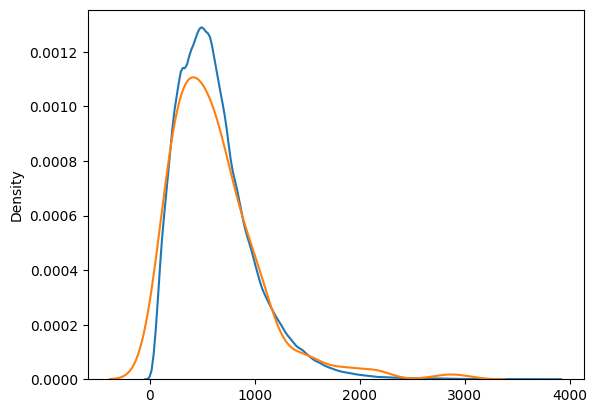

In [ ]:

sn.kdeplot(hmc.normalising_flow.cos_dist)
sn.kdeplot(hmc.cos_dist)

In [26]:
x=hmc.data
err=jnp.linalg.inv(hmc.error[-1])
real=hmc.normalising_flow.data+hmc.normalising_flow.mean

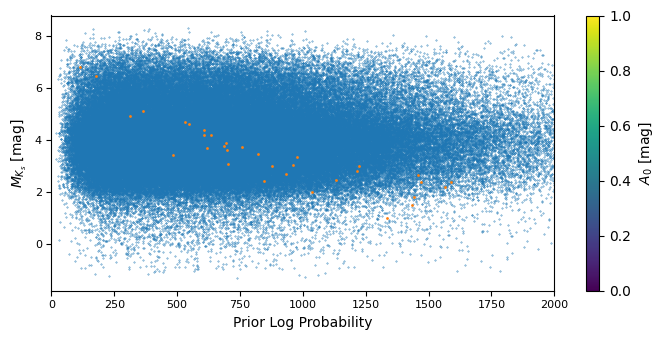

In [27]:
vmin = lp.min()
vmax = lp.max()
fig, ax = plt.subplots(figsize=(7, 3.5))  # figure size in inches (width, height)

# Scatter plot with colormap bounds
scatter2 = ax.scatter(hmc.normalising_flow.distance[:len(real)//32], real[:len(real)//32, 1], s=0.1)

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax)
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

plt.scatter(hmc.distance,x[:,1],s=1)
# Label x and y axes
ax.set_xlabel('Prior Log Probability', fontsize=10)
ax.set_ylabel('$M_{K_s}$ [mag]', fontsize=10)
ax.set_xlim(0, 2000)

# Set font sizes for ticks
ax.tick_params(axis='both', which='major', labelsize=8)

# Add legend

# Adjust layout
plt.tight_layout()

# Save the plot if needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/prior_log_prob.png', dpi=300)

# Display the plot
plt.show()

In [1]:
vmin = lp.min()
vmax = lp.max()
fig, ax = plt.subplots(figsize=(7, 3.5))  # figure size in inches (width, height)

# Scatter plot with colormap bounds
scatter2 = ax.scatter(pho[:,0], pho[:, 1], c=lp, s=0.1, cmap='viridis', vmin=vmin, vmax=vmax)

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax)
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

plt.scatter(x[0:1,0],x[0:1,1])
# Label x and y axes
ax.set_xlabel('Prior Log Probability', fontsize=10)
ax.set_ylabel('$M_{K_s}$ [mag]', fontsize=10)
ax.set_ylim(8, -1)

# Set font sizes for ticks
ax.tick_params(axis='both', which='major', labelsize=8)

# Add legend

# Adjust layout
plt.tight_layout()

# Save the plot if needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/prior_log_prob.png', dpi=300)

# Display the plot
plt.show()

NameError: name 'lp' is not defined

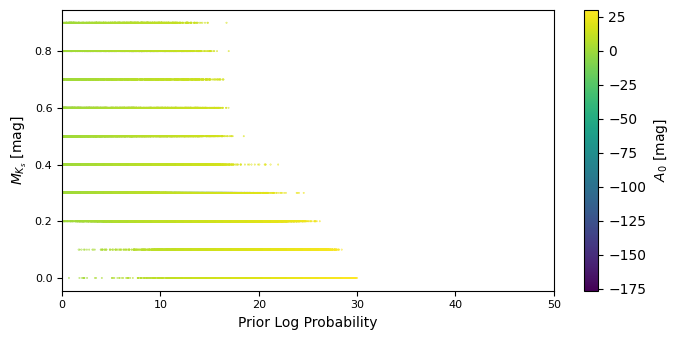

In [ ]:
vmin = lp.min()
vmax = lp.max()
fig, ax = plt.subplots(figsize=(7, 3.5))  # figure size in inches (width, height)

# Scatter plot with colormap bounds
scatter2 = ax.scatter(lp, a0s, c=lp, s=0.1, cmap='viridis', vmin=vmin, vmax=vmax)

# Add colorbar with title
cbar = plt.colorbar(scatter2, ax=ax)
cbar.set_label('$A_0$ [mag]', fontsize=10)  # adjust font size for colorbar label

# Label x and y axes
ax.set_xlabel('Prior Log Probability', fontsize=10)
ax.set_ylabel('$M_{K_s}$ [mag]', fontsize=10)

# Set font sizes for ticks
ax.tick_params(axis='both', which='major', labelsize=8)

# Add legend
plt.xlim(0,50)
# Adjust layout
plt.tight_layout()

# Save the plot if needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/prior_log_prob.png', dpi=300)

# Display the plot
plt.show()

# Data

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_41483/4264124884.py:1: DtypeWarning: Columns (34,36,46,51,52,54,55,56,57,58,59,60,61,62,64,109,114,115,116,117,118,119,120,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('/Users/mattocallaghan/XPNorm/Data/temp_gaia_data-2.csv')


,solution_id,DESIGNATION,SOURCE_ID,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,ebpminrp_gspphot_upper,libname_gspphot,source_id,r_med_geo,r_lo_geo,r_hi_geo,r_med_photogeo,r_lo_photogeo,r_hi_photogeo,flag
0,1.636148e+18,Gaia DR3 3961597535122283648,3.961598e+18,1.566444e+09,2016.0,192.920506,0.190495,27.018653,0.170630,2.088421,...,0.0010,MARCS,3.961598e+18,480.67685,424.46747,537.61743,467.21268,418.99686,522.90125,10033.0
1,1.636148e+18,Gaia DR3 3961600352620918016,3.961600e+18,3.457476e+08,2016.0,192.888481,1.954236,27.012658,0.880859,-1.415300,...,NaN,NaN,3.961600e+18,1603.11540,862.83760,2602.44750,3520.61870,2871.52440,4130.21100,20033.0
2,1.636148e+18,Gaia DR3 3961600459995547776,3.961600e+18,6.872938e+08,2016.0,192.900080,0.083144,27.013942,0.079507,1.628146,...,0.0375,MARCS,3.961600e+18,609.78840,569.11010,650.25620,600.62787,558.17303,653.74054,10033.0
3,1.636148e+18,Gaia DR3 3961600597433796224,3.961601e+18,3.458823e+08,2016.0,192.853881,0.699412,27.014708,0.531280,0.091791,...,NaN,NaN,3.961601e+18,1183.00950,736.92870,1892.35360,3572.17400,2886.54130,4417.38100,10033.0
4,1.636148e+18,Gaia DR3 3961600700513716736,3.961601e+18,1.689010e+09,2016.0,192.854729,0.031840,27.046442,0.027467,0.535590,...,0.0024,A,3.961601e+18,1739.28930,1619.35010,1902.84620,1769.64510,1643.60570,1900.94600,10023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383003,1.636148e+18,Gaia DR3 1445060232279223552,1.445060e+18,4.062950e+08,2016.0,204.059483,0.889569,25.431358,1.094947,-0.496751,...,NaN,NaN,1.445060e+18,1631.77880,792.87550,2563.87230,752.06170,706.37300,865.02905,20022.0
383004,1.636148e+18,Gaia DR3 1445060477092610560,1.445060e+18,1.397254e+09,2016.0,204.017829,0.071757,25.454439,0.056342,0.342276,...,0.0011,PHOENIX,1.445060e+18,2660.95240,2078.96660,3435.33100,2411.21170,2134.66670,2846.57470,10033.0
383005,1.636148e+18,Gaia DR3 1445060507157040512,1.445061e+18,8.932254e+08,2016.0,204.039540,0.060310,25.465312,0.044252,0.476482,...,0.0077,MARCS,1.445061e+18,1888.42790,1656.71150,2200.40770,2002.08120,1776.49850,2326.05400,10033.0
383006,1.636148e+18,Gaia DR3 1445066142154126336,1.445066e+18,1.607832e+09,2016.0,204.074527,0.174554,25.454849,0.133086,0.583499,...,NaN,NaN,1.445066e+18,2004.82840,1337.59310,4543.31450,3717.03600,3185.96920,4606.42630,10033.0
